In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.decomposition import PCA

In [2]:
import matplotlib.pyplot as plt
import matplotlib
zhfont1 = matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\simkai.ttf')

## 读取数据

In [3]:
df = pd.read_excel('社融&国房指数.xls',index_col = 0)
df.index = pd.to_datetime(df.index)

In [4]:
df.head()

,社会融资规模:当月值,国房景气指数
2002-01-31,-472.0,103.91
2002-02-28,289.0,103.53
2002-03-31,3136.0,103.87
2002-04-30,1151.0,104.37
2002-05-31,1774.0,104.60


In [5]:
dollar = pd.read_excel('美元指数.xls',index_col = 0)
interest = pd.read_excel('1年期国债收益率.xls',index_col = 0)

In [6]:
dollar.tail()

,美元指数
2019-04-24,98.0905
2019-04-25,98.1789
2019-04-26,98.0330
2019-04-29,97.8394
2019-04-30,97.5235


In [7]:
interest.tail()

,中债国债到期收益率:1年
2019-04-25,2.6902
2019-04-26,2.6742
2019-04-28,2.6988
2019-04-29,2.7223
2019-04-30,2.6902


In [8]:
#日度时间序列
oldtimes = df.index[:-1]

In [9]:
# 月度时间序列
newtimes = []
for thetime in oldtimes:
    if thetime.month != 1:
        newtimes.append(thetime)

## 所有指标处理成月度数据

In [10]:
alldata = pd.DataFrame(index = newtimes, columns = ['社融规模mean','社融规模sum','社融规模last','国房景气指数','美元指数','国债收益率'])
for thetime in newtimes:
    alldata['国房景气指数'][thetime] = df['国房景气指数'][thetime]
    if thetime.month !=2:
        themonth = str(thetime)[:7]
        alldata['社融规模mean'][thetime] = df['社会融资规模:当月值'][thetime]        
        alldata['社融规模sum'][thetime] = df['社会融资规模:当月值'][thetime] 
        alldata['社融规模last'][thetime] = df['社会融资规模:当月值'][thetime]
        alldata['美元指数'][thetime] = dollar[themonth].mean().values[0]
        alldata['国债收益率'][thetime] = interest[themonth].mean().values[0]
    else:
        themonth = str(thetime)[:7]
        lastmonth = str(thetime.year) + '-01'
        alldata['社融规模mean'][thetime] = df['社会融资规模:当月值'][lastmonth:themonth].mean()
        alldata['社融规模sum'][thetime] = df['社会融资规模:当月值'][lastmonth:themonth].sum()
        alldata['社融规模last'][thetime] = df['社会融资规模:当月值'][lastmonth].values[0]
        alldata['美元指数'][thetime] = dollar[lastmonth:themonth].mean().values[0]
        alldata['国债收益率'][thetime] = interest[lastmonth:themonth].mean().values[0]

In [11]:
alldata.head()

,社融规模mean,社融规模sum,社融规模last,国房景气指数,美元指数,国债收益率
2002-02-28,-91.5,-183,-472,103.53,118.339,2.15214
2002-03-31,3136,3136,3136,103.87,117.955,1.9575
2002-04-30,1151,1151,1151,104.37,116.884,1.97943
2002-05-31,1774,1774,1774,104.6,113.383,1.88149
2002-06-30,2621,2621,2621,104.65,109.586,1.79802


In [12]:
alldata.isna().sum()

社融规模mean    0
社融规模sum     0
社融规模last    0
国房景气指数      0
美元指数        0
国债收益率       0
dtype: int64

## MA与延期处理

In [13]:
alldata['国债收益率shift11'] = alldata['国债收益率'].shift(11)
alldata['社融sum_MA11'] = alldata['社融规模sum'].rolling(11).mean()

In [14]:
alldata = alldata.dropna()

In [15]:
alldata['新增社融sum'] = alldata['社融sum_MA11']/alldata['社融sum_MA11'].shift(11) - 1

In [16]:
alldata = alldata.dropna()

In [17]:
alldata.head()

,社融规模mean,社融规模sum,社融规模last,国房景气指数,美元指数,国债收益率,国债收益率shift11,社融sum_MA11,新增社融sum
2004-02-29,1276,2552,2114,106.58,86.3898,2.39231,1.6556,2934.636364,0.307982
2004-03-31,6557,6557,6557,106.11,88.4578,2.48729,1.7344,3163.363636,0.360055
2004-04-30,2731,2731,2731,105.48,89.7995,2.66014,1.92496,3173.272727,0.290139
2004-05-31,2443,2443,2443,105,90.4729,2.84195,2.04215,3125.272727,0.216791
2004-06-30,3229,3229,3229,104.8,89.155,2.95709,2.17655,2887.727273,0.009246


In [18]:
newdata = alldata[['新增社融sum','国债收益率shift11','国房景气指数','美元指数']]
newdata.columns = ['新增社融','国债收益率shift','国房景气指数','美元指数']

In [19]:
newdata['国债收益率shift'] = newdata['国债收益率shift']*(-1)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
newdata_standard = newdata/newdata.iloc[0]*100

## 处理完成后的指标

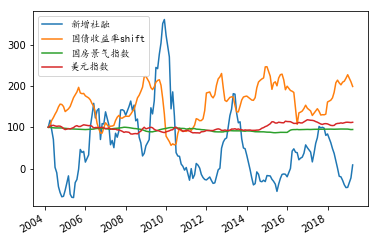

In [21]:
newdata_standard.plot()
plt.legend(prop=zhfont1)

## 用社融和国房景气度两项求取主成分

In [27]:
    newdata = newdata[['新增社融','国房景气指数']]
    thetimes = newdata['2010':].index
    Primary = pd.Series(index = thetimes)#存储主成分结果序列
    Primary.iloc[0] = 100
    weight = pd.DataFrame()#存储指标权重值
    weight2 = pd.DataFrame()#储存权重值翻转处理后结果
    midvalue = 100
    midvalue2 = 100
    loading = pd.DataFrame()#储存因子载荷
    loading2 = pd.DataFrame()#因子载荷反转后结果
    for time in thetimes[1:]:
        strtime = str(time)
        btime = str(int(strtime[:4])-5)+strtime[4:7]#滚动窗起始时间
        thedata = newdata[btime:time]
        thedata_standard = (thedata-thedata.mean())/thedata.std()#原始数据标准化
        X = np.array(thedata_standard)
        pca = PCA(n_components=1)#调包PCA
        newX = pca.fit_transform(X)
        PC = pd.DataFrame(newX)#窗口期内主成分序列结果
        
        spect = pca.components_#特征向量
        contr = pca.explained_variance_ratio_[0]#方差贡献
        theloading = spect*(contr**2)#因子载荷
        loading = pd.concat([loading,pd.DataFrame(theloading)])
        weight = pd.concat([weight,pd.DataFrame(spect)])
        
        PC = PC/theloading.sum()*100
        PC = (PC - PC.mean())/PC.std()+100#进一步标准化
        PC = PC/PC.iloc[0]*100
        
        change = PC.iloc[-1] - PC.iloc[-2]#获得窗口期主成分序列最后两项差值
        midvalue = change + midvalue
        Primary[time] = midvalue

        if theloading.sum()<0:#判断因子载荷是否翻转
            sign = -1
        else:
            sign = 1
        #midvalue2 = sign * change + midvalue2
        #Primary2[time] = midvalue2
        loading2 = pd.concat([loading2,pd.DataFrame(theloading*sign)])
        weight2 = pd.concat([weight2,pd.DataFrame(spect*sign)])
    loading2.index = thetimes[1:]
    loading2.columns = newdata.columns

    loading.index = thetimes[1:]
    loading.columns = newdata.columns

    weight.index = thetimes[1:]
    weight.columns = newdata.columns
    weight2.index = thetimes[1:]
    weight2.columns = newdata.columns

## 严格按照上述步骤求出的主成分结果

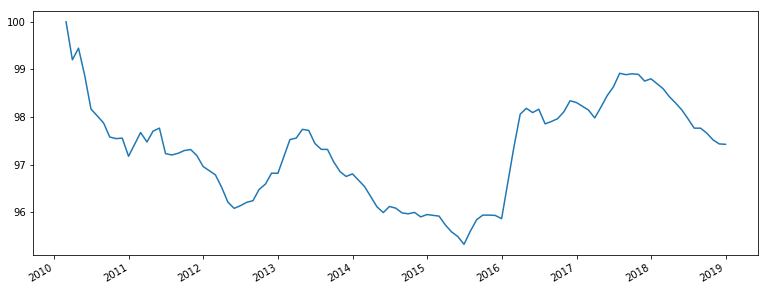

In [28]:
fig = plt.figure(figsize=(13,5))
Primary['2010':'2018'].plot()

### 因子载荷结果

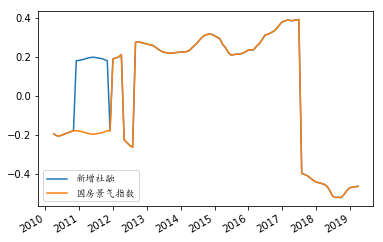

In [29]:
loading.plot()
plt.legend(prop=zhfont1)

In [34]:
weight

,新增社融,国房景气指数
2010-03-31,-0.707107,-0.707107
2010-04-30,-0.707107,-0.707107
2010-05-31,-0.707107,-0.707107
2010-06-30,-0.707107,-0.707107
2010-07-31,-0.707107,-0.707107
2010-08-31,-0.707107,-0.707107
2010-09-30,-0.707107,-0.707107
2010-10-31,-0.707107,-0.707107
2010-11-30,0.707107,-0.707107
2010-12-31,0.707107,-0.707107


### 权重结果

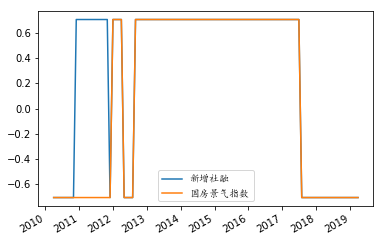

In [30]:
weight.plot()
plt.legend(prop=zhfont1)

### 因子载荷翻转处理后

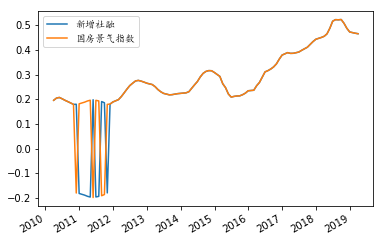

In [31]:
loading2.plot()
plt.legend(prop=zhfont1)

### 权重翻转处理后

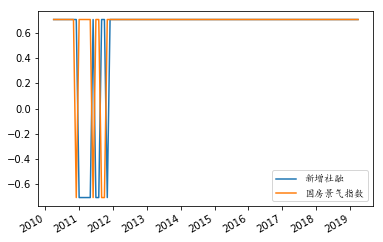

In [32]:
weight2.plot()
plt.legend(prop=zhfont1)

## 国债收益率数据读出与初步处理

In [35]:
bondreturn = pd.read_excel('10年国债收益率.xls',index_col = 0)

In [36]:
bondreturn.head()

,中债国债到期收益率:10年
指标名称,
2010-01-04,3.6603
2010-01-05,3.6606
2010-01-06,3.6425
2010-01-07,3.6543
2010-01-08,3.6614


In [41]:
bondindex = Primary.index
def get_monthreturn(bondreturn):
    bondreturnM = pd.DataFrame(index = bondindex, columns = ['净值','收益率'])
    colname = bondreturn.columns[0]
    for thetime in bondindex:
        themonth = str(thetime)[:7]
        bondreturnM['净值'][thetime] = bondreturn[colname][themonth].iloc[-1]
    bondreturnM['收益率'] = bondreturnM['净值']/bondreturnM['净值'].shift(1) - 1
    bondreturnM = bondreturnM.fillna(0)
    return bondreturnM

In [42]:
bondreturnM = get_monthreturn(bondreturn)

In [43]:
bondreturnM.head()

,净值,收益率
2010-02-28,3.3753,0.000000
2010-03-31,3.4818,0.031553
2010-04-30,3.3565,-0.035987
2010-05-31,3.2430,-0.033815
2010-06-30,3.2790,0.011101


## 定义构造多空策略的函数

In [44]:
def longshort_true(signal, monthreturn):
    long = (signal.shift(1)>signal.shift(2))
    longshort = long*2-1
    strategy_month = longshort*monthreturn
    cumprod = (strategy_month+1).cumprod()
    return cumprod*100

### 用严格按照步骤窗口处理获得的PCA序列做的多空策略结果

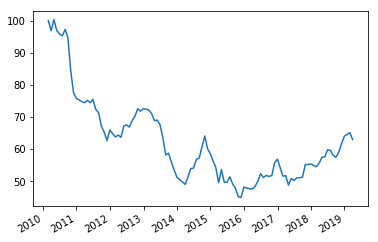

In [47]:
returns = longshort_true(Primary,bondreturnM['收益率'])
returns.plot()

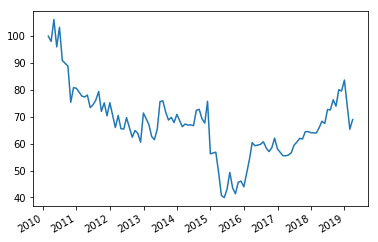

In [50]:
hs300 = pd.read_excel('沪深300.xls',index_col = 0)
hs300M = get_monthreturn(hs300)
returns = longshort_true(Primary,hs300M['收益率'])
returns.plot()

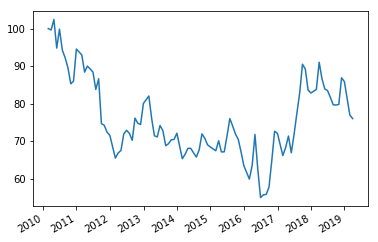

In [51]:
NHindustry = pd.read_excel('南华工业品指数.xls',index_col = 0)
NHindustryM = get_monthreturn(NHindustry)
returns = longshort_true(Primary,NHindustryM['收益率'])
returns.plot()

In [52]:
bond1 = pd.read_excel('中债-国开行债券总财富(1-3年)指数.xlsx',usecols=[2,6],index_col=0)
bond5 = pd.read_excel('中债-国开行债券总财富(3-5年)指数.xlsx',usecols=[2,6],index_col=0)
bond10 = pd.read_excel('中债-国开行债券总财富(7-10年)指数.xlsx',usecols=[2,6],index_col=0)

In [53]:
bond1M = get_monthreturn(bond1)
bond5M = get_monthreturn(bond5)
bond10M = get_monthreturn(bond10)

In [57]:
def longshort3bond_true(signal, betterlong, bettershort, worselong, worseshort):
    long = (signal.shift(1)>signal.shift(2))
    longReturn = long*(betterlong-bettershort)
    short = -long + 1
    shortReturn = short*(worselong-worseshort)
    strategy_month = longReturn+shortReturn
    cumsum = strategy_month.cumsum()
    return (cumsum+1)*100

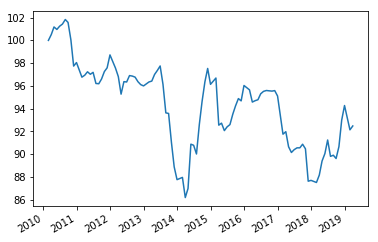

In [58]:
returns = longshort3bond_true(Primary,bond1M['收益率'],bond5M['收益率'],bond10M['收益率'],bond5M['收益率'])
returns.plot()